# Importing Libraries + Setting Path.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import os
import operator
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn import metrics
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import multilabel_confusion_matrix, accuracy_score, confusion_matrix, ConfusionMatrixDisplay
from sklearn.preprocessing import StandardScaler

path = r'C:\Users\Chaot\Python stuff\07 - Basics of Machine Learning for Analysts'

# Importing Data.

In [2]:
scaled_temps = pd.read_csv(os.path.join(path, 'Data Brief + Data Sets', '1.4_scaled_temps.csv'))
scaled_temps

,Unnamed: 0,DATE,MONTH,BASEL_temp_mean,BASEL_temp_min,BASEL_temp_max,BELGRADE_temp_mean,BELGRADE_temp_min,BELGRADE_temp_max,BUDAPEST_temp_mean,...,OSLO_temp_max,SONNBLICK_temp_mean,SONNBLICK_temp_min,SONNBLICK_temp_max,STOCKHOLM_temp_mean,STOCKHOLM_temp_min,STOCKHOLM_temp_max,VALENTIA_temp_mean,VALENTIA_temp_min,VALENTIA_temp_max
0,0,19600101,1,-0.528623,-0.845652,-0.478356,-1.016876,-1.220210,-0.949203,-1.099163,...,-0.474865,-0.124331,-0.170125,-0.063322,-0.391072,-0.290439,-0.639538,-0.668215,-0.519743,-0.752237
1,1,19600102,1,-0.582946,-0.462450,-0.569988,-1.107669,-0.818702,-1.298119,-1.110927,...,-0.582847,-0.650834,-0.456455,-0.839563,-0.415953,-0.183610,-0.628550,-0.548046,-0.629054,-0.407141
2,2,19600103,1,-0.257010,-0.186545,-0.592896,-1.084971,-1.168403,-1.098738,-1.063873,...,-0.777215,-0.650834,-0.384873,-0.898147,-0.615003,-0.410621,-0.727444,-0.067372,0.054135,-0.177078
3,3,19600104,1,-0.555784,-0.385810,-0.512718,-1.209812,-1.362681,-1.437685,-1.146217,...,-0.582847,-0.943336,-0.800052,-1.059254,-0.764290,-0.530804,-0.925231,-0.998679,-0.164486,-0.838511
4,4,19600105,1,-1.003946,-1.075573,-1.039603,-1.209812,-1.012980,-1.457623,-1.087400,...,-0.582847,-0.621584,-0.671203,-0.546642,-0.503037,-0.477389,-0.705467,-1.509396,-1.339569,-1.471186
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22945,22945,20221027,10,0.747959,0.779123,0.724314,0.628750,0.463536,0.695687,-0.005167,...,0.183825,0.826301,0.846347,0.786149,0.517090,0.510778,0.382364,-0.007287,-0.000520,-0.004530
22946,22946,20221028,10,0.856604,1.223637,0.781585,0.367720,0.269258,0.376678,-0.005167,...,0.151430,1.074927,1.132678,0.991194,0.641496,0.884680,0.393353,-0.007287,-0.000520,-0.004530
22947,22947,20221029,10,0.856604,1.039701,0.838855,0.083991,0.010220,0.077607,-0.005167,...,0.421385,1.221178,1.347425,1.064424,0.716139,1.031570,0.404341,-0.007287,-0.000520,-0.004530
22948,22948,20221030,10,0.680055,0.809780,0.689952,0.265577,0.074979,0.346771,-0.005167,...,-0.237305,1.235803,1.433325,1.005840,0.019467,0.096816,0.184577,-0.007287,-0.000520,-0.004530


In [3]:
 # Excluding Gdansk, Roma & Tours.
scaled_temps = scaled_temps[['DATE','MONTH',
 'BASEL_temp_mean','BASEL_temp_min','BASEL_temp_max',        
 'BELGRADE_temp_mean','BELGRADE_temp_min','BELGRADE_temp_max',
 'BUDAPEST_temp_mean', 'BUDAPEST_temp_min', 'BUDAPEST_temp_max',
 'DEBILT_temp_mean','DEBILT_temp_min','DEBILT_temp_max',
 'DUSSELDORF_temp_mean','DUSSELDORF_temp_min','DUSSELDORF_temp_max',
 'HEATHROW_temp_mean','HEATHROW_temp_min','HEATHROW_temp_max',
 'KASSEL_temp_mean','KASSEL_temp_min','KASSEL_temp_max',
 'LJUBLJANA_temp_mean','LJUBLJANA_temp_min','LJUBLJANA_temp_max',
 'MAASTRICHT_temp_mean','MAASTRICHT_temp_min','MAASTRICHT_temp_max',
 'MADRID_temp_mean','MADRID_temp_min','MADRID_temp_max',
 'MUNCHENB_temp_mean','MUNCHENB_temp_min','MUNCHENB_temp_max',
 'OSLO_temp_mean','OSLO_temp_min','OSLO_temp_max',
 'SONNBLICK_temp_mean','SONNBLICK_temp_min','SONNBLICK_temp_max',   
 'STOCKHOLM_temp_mean','STOCKHOLM_temp_min','STOCKHOLM_temp_max',
 'VALENTIA_temp_mean','VALENTIA_temp_min','VALENTIA_temp_max']].copy()
scaled_temps

,DATE,MONTH,BASEL_temp_mean,BASEL_temp_min,BASEL_temp_max,BELGRADE_temp_mean,BELGRADE_temp_min,BELGRADE_temp_max,BUDAPEST_temp_mean,BUDAPEST_temp_min,...,OSLO_temp_max,SONNBLICK_temp_mean,SONNBLICK_temp_min,SONNBLICK_temp_max,STOCKHOLM_temp_mean,STOCKHOLM_temp_min,STOCKHOLM_temp_max,VALENTIA_temp_mean,VALENTIA_temp_min,VALENTIA_temp_max
0,19600101,1,-0.528623,-0.845652,-0.478356,-1.016876,-1.220210,-0.949203,-1.099163,-1.119431,...,-0.474865,-0.124331,-0.170125,-0.063322,-0.391072,-0.290439,-0.639538,-0.668215,-0.519743,-0.752237
1,19600102,1,-0.582946,-0.462450,-0.569988,-1.107669,-0.818702,-1.298119,-1.110927,-0.878727,...,-0.582847,-0.650834,-0.456455,-0.839563,-0.415953,-0.183610,-0.628550,-0.548046,-0.629054,-0.407141
2,19600103,1,-0.257010,-0.186545,-0.592896,-1.084971,-1.168403,-1.098738,-1.063873,-0.838610,...,-0.777215,-0.650834,-0.384873,-0.898147,-0.615003,-0.410621,-0.727444,-0.067372,0.054135,-0.177078
3,19600104,1,-0.555784,-0.385810,-0.512718,-1.209812,-1.362681,-1.437685,-1.146217,-1.012452,...,-0.582847,-0.943336,-0.800052,-1.059254,-0.764290,-0.530804,-0.925231,-0.998679,-0.164486,-0.838511
4,19600105,1,-1.003946,-1.075573,-1.039603,-1.209812,-1.012980,-1.457623,-1.087400,-0.918844,...,-0.582847,-0.621584,-0.671203,-0.546642,-0.503037,-0.477389,-0.705467,-1.509396,-1.339569,-1.471186
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22945,20221027,10,0.747959,0.779123,0.724314,0.628750,0.463536,0.695687,-0.005167,-0.009517,...,0.183825,0.826301,0.846347,0.786149,0.517090,0.510778,0.382364,-0.007287,-0.000520,-0.004530
22946,20221028,10,0.856604,1.223637,0.781585,0.367720,0.269258,0.376678,-0.005167,-0.009517,...,0.151430,1.074927,1.132678,0.991194,0.641496,0.884680,0.393353,-0.007287,-0.000520,-0.004530
22947,20221029,10,0.856604,1.039701,0.838855,0.083991,0.010220,0.077607,-0.005167,-0.009517,...,0.421385,1.221178,1.347425,1.064424,0.716139,1.031570,0.404341,-0.007287,-0.000520,-0.004530
22948,20221030,10,0.680055,0.809780,0.689952,0.265577,0.074979,0.346771,-0.005167,-0.009517,...,-0.237305,1.235803,1.433325,1.005840,0.019467,0.096816,0.184577,-0.007287,-0.000520,-0.004530


In [4]:
pleasant_weather = pd.read_csv(os.path.join(path, 'Data Brief + Data Sets', 'Dataset-Answers-Weather_Prediction_Pleasant_Weather.csv'))
pleasant_weather

,DATE,BASEL_pleasant_weather,BELGRADE_pleasant_weather,BUDAPEST_pleasant_weather,DEBILT_pleasant_weather,DUSSELDORF_pleasant_weather,HEATHROW_pleasant_weather,KASSEL_pleasant_weather,LJUBLJANA_pleasant_weather,MAASTRICHT_pleasant_weather,MADRID_pleasant_weather,MUNCHENB_pleasant_weather,OSLO_pleasant_weather,SONNBLICK_pleasant_weather,STOCKHOLM_pleasant_weather,VALENTIA_pleasant_weather
0,19600101,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,19600102,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,19600103,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,19600104,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,19600105,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22945,20221027,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
22946,20221028,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
22947,20221029,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
22948,20221030,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


# Splitting Data, Creating Training data & Fitting the Scaled Data.

In [5]:
X = scaled_temps.drop(['DATE','MONTH'], axis=1)
y = pleasant_weather.drop(['DATE'], axis=1)
print(X.shape)
print(y.shape)

(22950, 45)
(22950, 15)


In [6]:
#Split data into training and testing sets.
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(17212, 45)
(5738, 45)
(17212, 15)
(5738, 15)


In [7]:
X_train[:10]

,BASEL_temp_mean,BASEL_temp_min,BASEL_temp_max,BELGRADE_temp_mean,BELGRADE_temp_min,BELGRADE_temp_max,BUDAPEST_temp_mean,BUDAPEST_temp_min,BUDAPEST_temp_max,DEBILT_temp_mean,...,OSLO_temp_max,SONNBLICK_temp_mean,SONNBLICK_temp_min,SONNBLICK_temp_max,STOCKHOLM_temp_mean,STOCKHOLM_temp_min,STOCKHOLM_temp_max,VALENTIA_temp_mean,VALENTIA_temp_min,VALENTIA_temp_max
8196,1.359088,1.116341,1.354285,1.116763,0.994564,1.114386,1.265281,1.421337,1.111177,0.993200,...,0.669744,1.074927,1.161311,0.961902,0.143873,0.083463,0.129636,1.464779,1.584476,1.174547
20472,-1.655817,-1.458775,-1.784113,-1.845364,-1.880757,-1.726787,-1.769677,-2.028759,-1.678407,-1.981379,...,-1.997412,-1.806216,-1.701992,-1.879433,-1.771976,-1.839458,-1.683417,-0.007287,-0.000520,-0.004530
18269,-1.655817,-1.887961,-1.646665,-1.073622,-0.896413,-1.068831,-1.428538,-1.239783,-1.555788,-2.361113,...,-2.375349,-1.323588,-1.172281,-1.454697,-1.946144,-2.360249,-1.782310,-2.921377,-3.225169,-2.190135
7713,-1.601495,-1.550743,-1.486309,-1.357351,-1.064788,-1.487530,-1.205034,-1.092686,-1.249240,-1.554179,...,-1.425107,-2.318095,-2.160121,-2.435983,-1.187269,-1.278606,-1.342783,-1.178932,-0.656381,-1.126091
21958,-0.582946,-0.692371,-0.180552,-0.676402,-0.883461,-0.570380,-0.652154,-0.718257,-0.554399,-0.683956,...,-0.539655,-1.411339,-1.329763,-1.454697,-0.789171,-0.664340,-0.793373,-0.007287,-0.000520,-0.004530
11464,1.073894,0.656499,1.033573,0.685496,0.800286,0.655811,0.818272,0.873066,0.590046,0.328667,...,0.648148,0.358298,0.488435,0.214953,0.330481,0.444010,0.536199,0.713725,0.300082,0.973241
3984,-0.908881,-1.044917,-1.005241,-0.937432,-0.663279,-1.238305,-0.828605,-0.490926,-1.106184,-0.763067,...,-1.133556,0.358298,0.459802,0.258891,-0.776730,-0.584218,-0.892266,0.052797,0.382065,-0.292110
4752,-1.941011,-2.102554,-1.910107,-1.380049,-1.103643,-1.567283,-1.134453,-0.892099,-1.371859,-1.221912,...,-0.734022,-0.767835,-0.714153,-0.795625,-0.751849,-0.744462,-0.848314,-0.067372,0.491375,-0.608447
11092,0.720797,0.748467,0.838855,0.980574,0.722574,0.944913,1.041776,1.033535,0.968122,0.550178,...,0.972094,0.636174,0.731815,0.522520,0.566852,0.564193,0.558176,0.563514,0.436720,0.656903
21377,1.141798,0.549202,1.251199,1.241604,1.499688,0.974820,1.159410,1.194005,1.121396,1.420401,...,2.051914,1.382054,0.946563,1.796727,1.574539,1.311995,1.722924,-0.007287,-0.000520,-0.004530


In [8]:
#Scaling the data
scaler = StandardScaler()

#Fit the train data
scaler.fit(X_train)

#Scaling the X data
X_train_sc = scaler.transform(X_train)
X_test_sc = scaler.transform(X_test)

print(X_train_sc[:10])

[[ 1.35262702  1.11276341  1.34868206  1.11408523  0.99179258  1.11246326
   1.26048221  1.41697324  1.10697952  0.98510239  0.27261046  1.06316111
   1.18267178  0.52330277  1.16115631  0.79366897  0.96825669  0.78386739
   1.16696642  0.78979914  1.05716978  1.02406684  1.06311492  1.16453988
   1.12530567  0.80824638  1.14009194  1.32713725  1.38711695  1.2354766
   1.26235516  1.08352478  1.30371106  0.49003378  0.4005023   0.66666472
   1.0719053   1.15913292  0.95856552  0.14041372  0.08067133  0.12583524
   1.45475014  1.57581674  1.16512065]
 [-1.65254457 -1.45514929 -1.7832748  -1.84706463 -1.88229936 -1.72749967
  -1.77256635 -2.03376427 -1.68051796 -1.98055572 -2.3915111  -1.82272911
  -2.10946465 -2.09198145 -2.01407649 -1.72667839 -1.87256348 -1.23096301
  -0.01359355 -0.01005412 -0.00955445 -1.83095876 -1.98232251 -1.76837474
  -2.09029531 -2.36657529 -1.76598173 -1.23266439 -1.14271919 -1.27880705
  -1.73566519 -1.73719666 -1.6507966  -2.14158559 -2.16853949 -1.99788576


In [9]:
#Assign the scaled data to DataFrames
X_train_df = pd.DataFrame(X_train_sc, index=X_train.index, columns=X_train.columns)
X_test_df = pd.DataFrame(X_test_sc, index=X_test.index, columns=X_test.columns)

In [10]:
locations = list({x.split("_")[0] for x in scaled_temps.columns if x not in ['MONTH','DATE']})
locations.sort()

# Create the ANN with a 50 & 50 nodes.

In [11]:
mlp = MLPClassifier(hidden_layer_sizes=(50, 50), max_iter=500, tol=0.0001)
#Fit the data to the model
mlp.fit(X_train, y_train)

MLPClassifier(hidden_layer_sizes=(50, 50), max_iter=500)

In [12]:
y_pred = mlp.predict(X_train)
print(accuracy_score(y_pred, y_train))
y_pred_test = mlp.predict(X_test)
print(accuracy_score(y_pred_test, y_test))

0.5540320706483849
0.5259672359707215


G:\Anaconda\Lib\site-packages\sklearn\metrics\_classification.py:386: UserWarning: A single label was found in 'y_true' and 'y_pred'. For the confusion matrix to have the correct shape, use the 'labels' parameter to pass all known labels.
  warnings.warn(


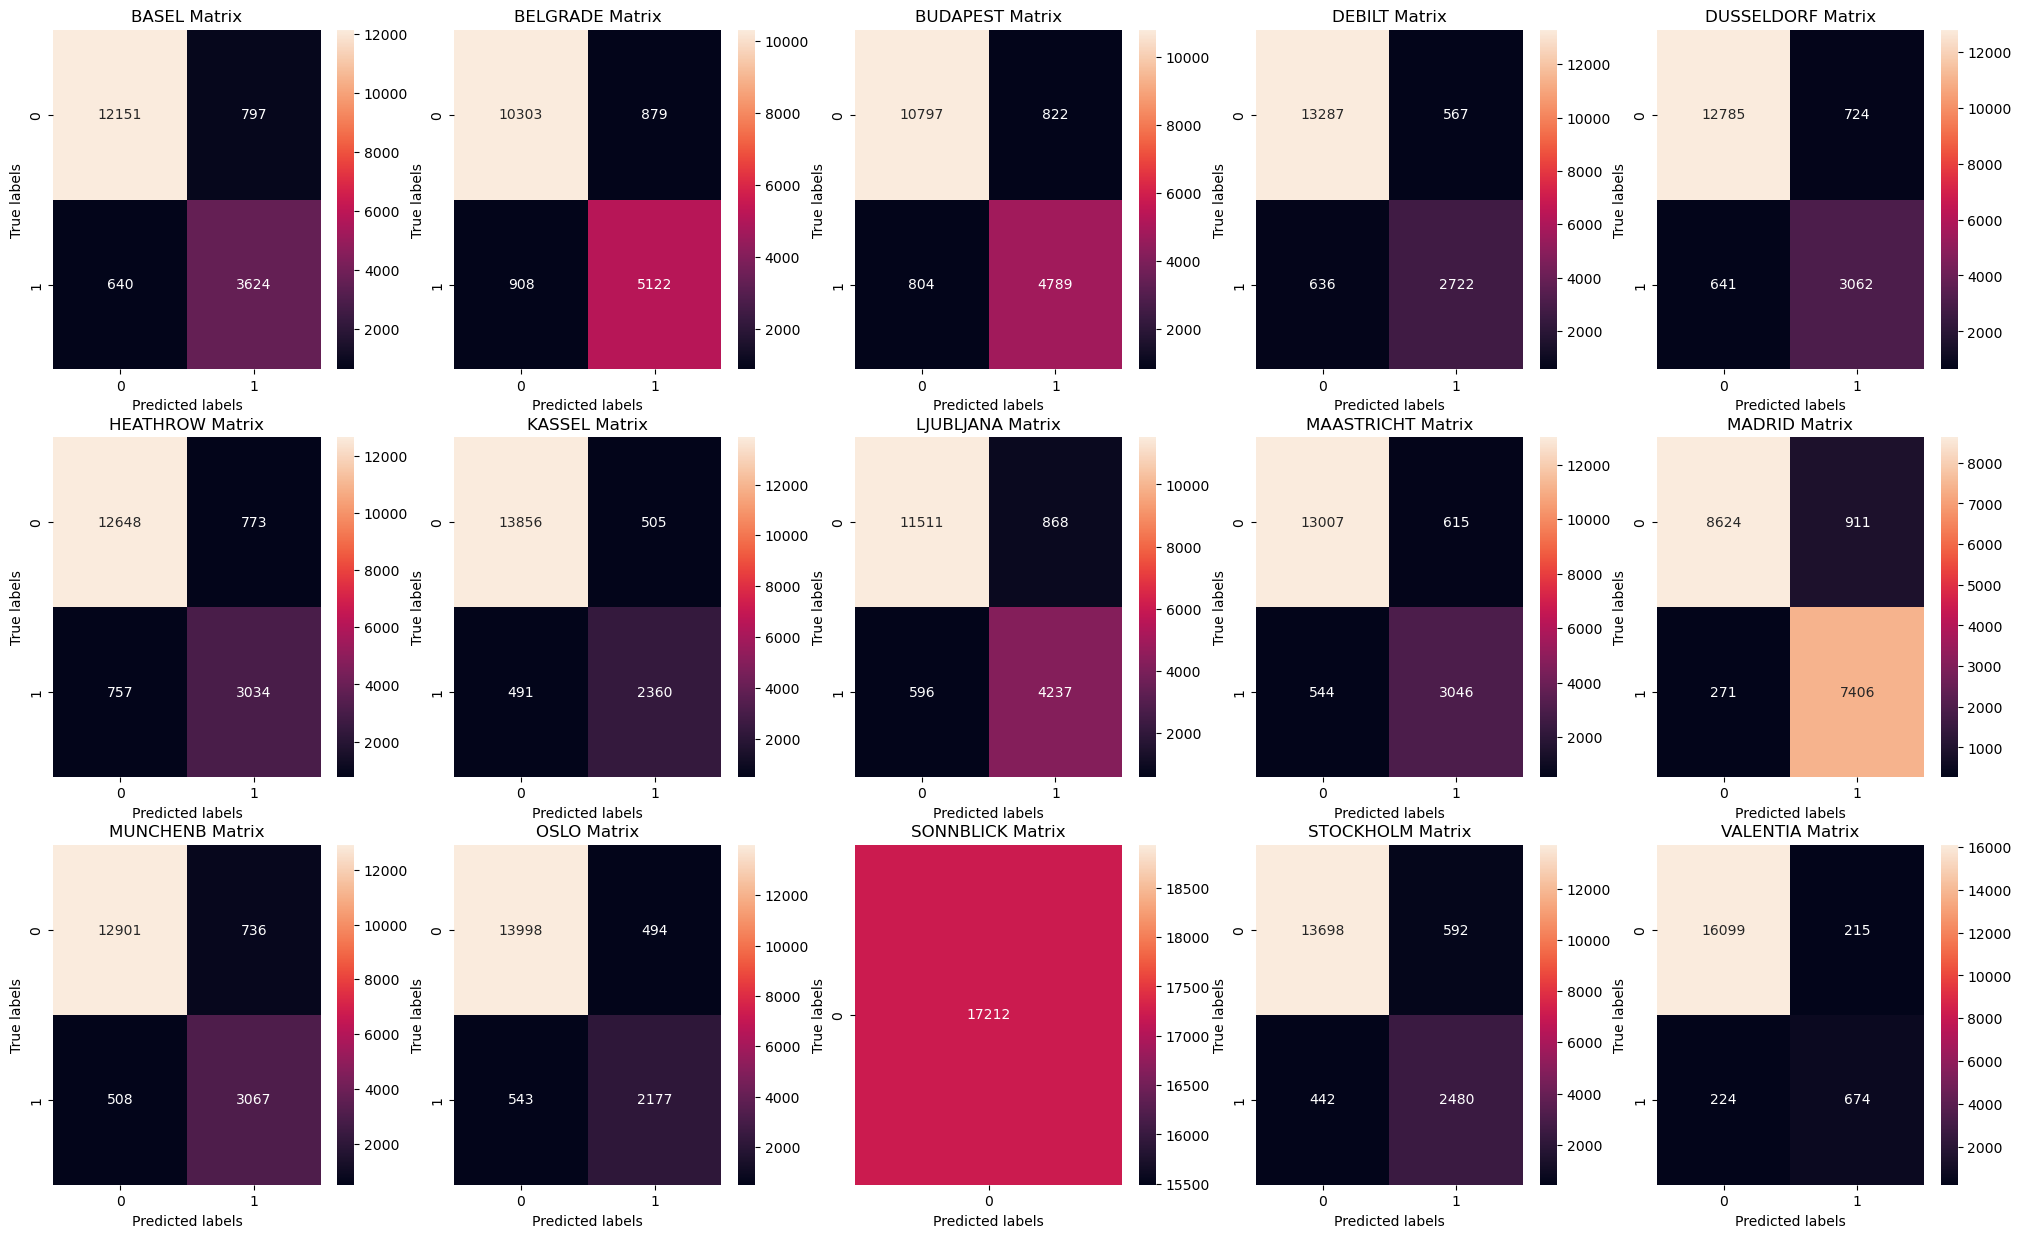

In [13]:
#Confusion matrix based on the last "k" in the sequence (Training data)

key = '_pleasant_weather'
stations = []
figure, ax = plt.subplots(3, 5, figsize=(25,15))
labels = ['pleasant', 'unpleasant']   
count=0
for i in range(3):
    for j in range(5):
        name = locations[count]
        cm = confusion_matrix(y_train.loc[:,name+key], y_pred[:,count])
        disp = ConfusionMatrixDisplay(confusion_matrix=cm)
        ax[i,j] = sns.heatmap(cm, annot=True, fmt='g', ax=ax[i,j]);
        # labels, title and ticks
        ax[i,j].set_xlabel('Predicted labels');
        ax[i,j].set_ylabel('True labels'); 
        ax[i,j].set_title(name +' Matrix'); 
        #ax[i,j].xaxis.set_ticklabels(labels); #These two lines may throw an error depending on SONNBLICK data. Can you tell why?
        #ax[i,j].yaxis.set_ticklabels(labels);
        count+=1
        

# Creating the ANN with 3 layers.

In [14]:
mlp = MLPClassifier(hidden_layer_sizes=(50, 50, 50), max_iter=500, tol=0.0001)
#Fit the data to the model
mlp.fit(X_train, y_train)

MLPClassifier(hidden_layer_sizes=(50, 50, 50), max_iter=500)

In [15]:
y_pred = mlp.predict(X_train)
print(accuracy_score(y_pred, y_train))
y_pred_test = mlp.predict(X_test)
print(accuracy_score(y_pred_test, y_test))

0.5586218917034627
0.5155106308818403


G:\Anaconda\Lib\site-packages\sklearn\metrics\_classification.py:386: UserWarning: A single label was found in 'y_true' and 'y_pred'. For the confusion matrix to have the correct shape, use the 'labels' parameter to pass all known labels.
  warnings.warn(


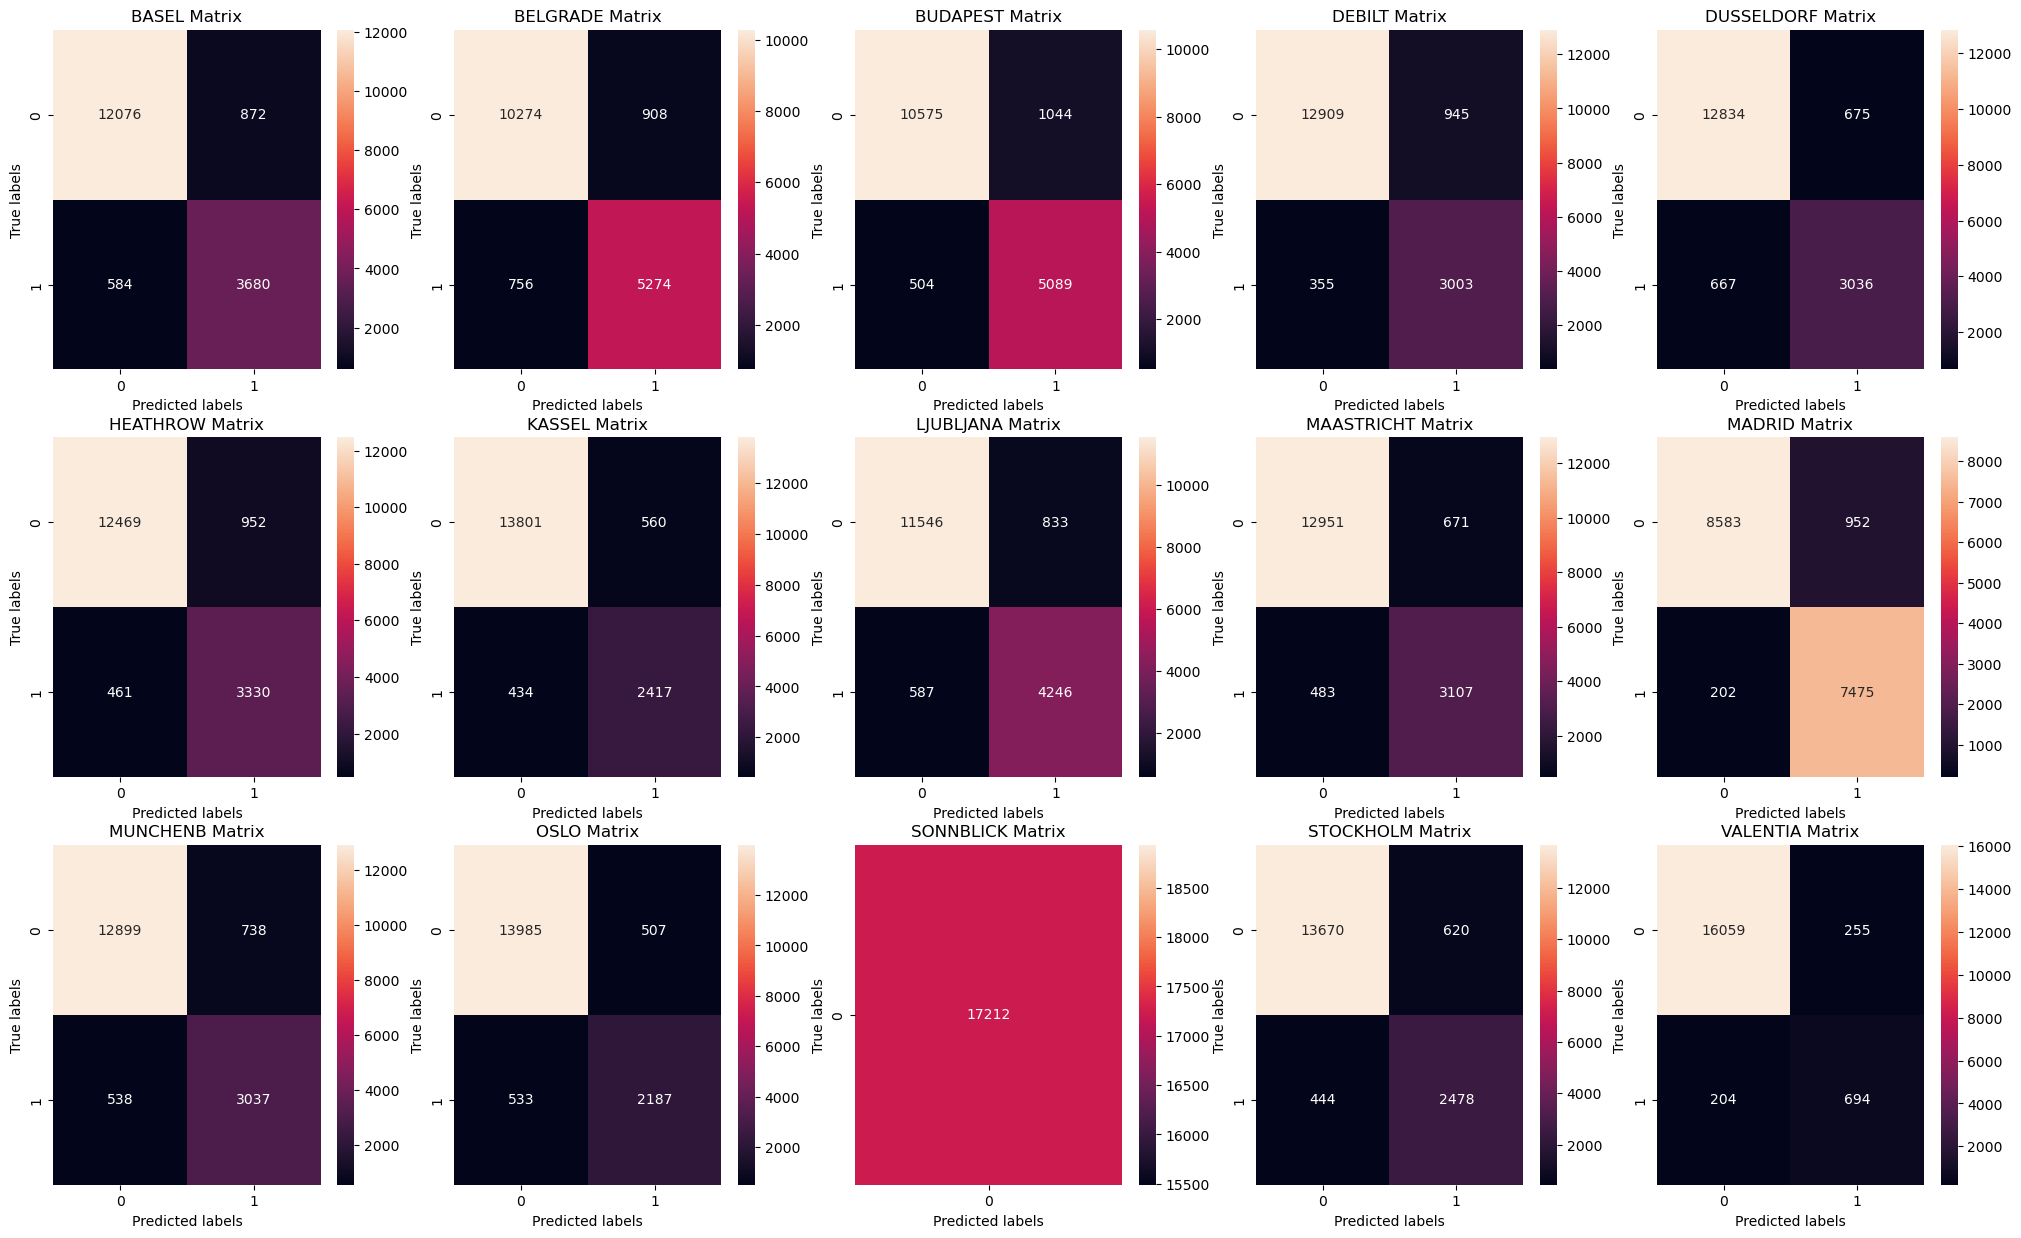

In [16]:
#Confusion matrix based on the last "k" in the sequence (Training data)
key = '_pleasant_weather'
stations = []
figure, ax = plt.subplots(3, 5, figsize=(25,15))
labels = ['pleasant', 'unpleasant']   
count=0
for i in range(3):
    for j in range(5):
        name = locations[count]
        cm = confusion_matrix(y_train.loc[:,name+key], y_pred[:,count])
        disp = ConfusionMatrixDisplay(confusion_matrix=cm)
        ax[i,j] = sns.heatmap(cm, annot=True, fmt='g', ax=ax[i,j]);
        # labels, title and ticks
        ax[i,j].set_xlabel('Predicted labels');
        ax[i,j].set_ylabel('True labels'); 
        ax[i,j].set_title(name +' Matrix'); 
        #ax[i,j].xaxis.set_ticklabels(labels); #These two lines may throw an error depending on SONNBLICK data. Can you tell why?
        #ax[i,j].yaxis.set_ticklabels(labels);
        count+=1

G:\Anaconda\Lib\site-packages\sklearn\metrics\_classification.py:386: UserWarning: A single label was found in 'y_true' and 'y_pred'. For the confusion matrix to have the correct shape, use the 'labels' parameter to pass all known labels.
  warnings.warn(


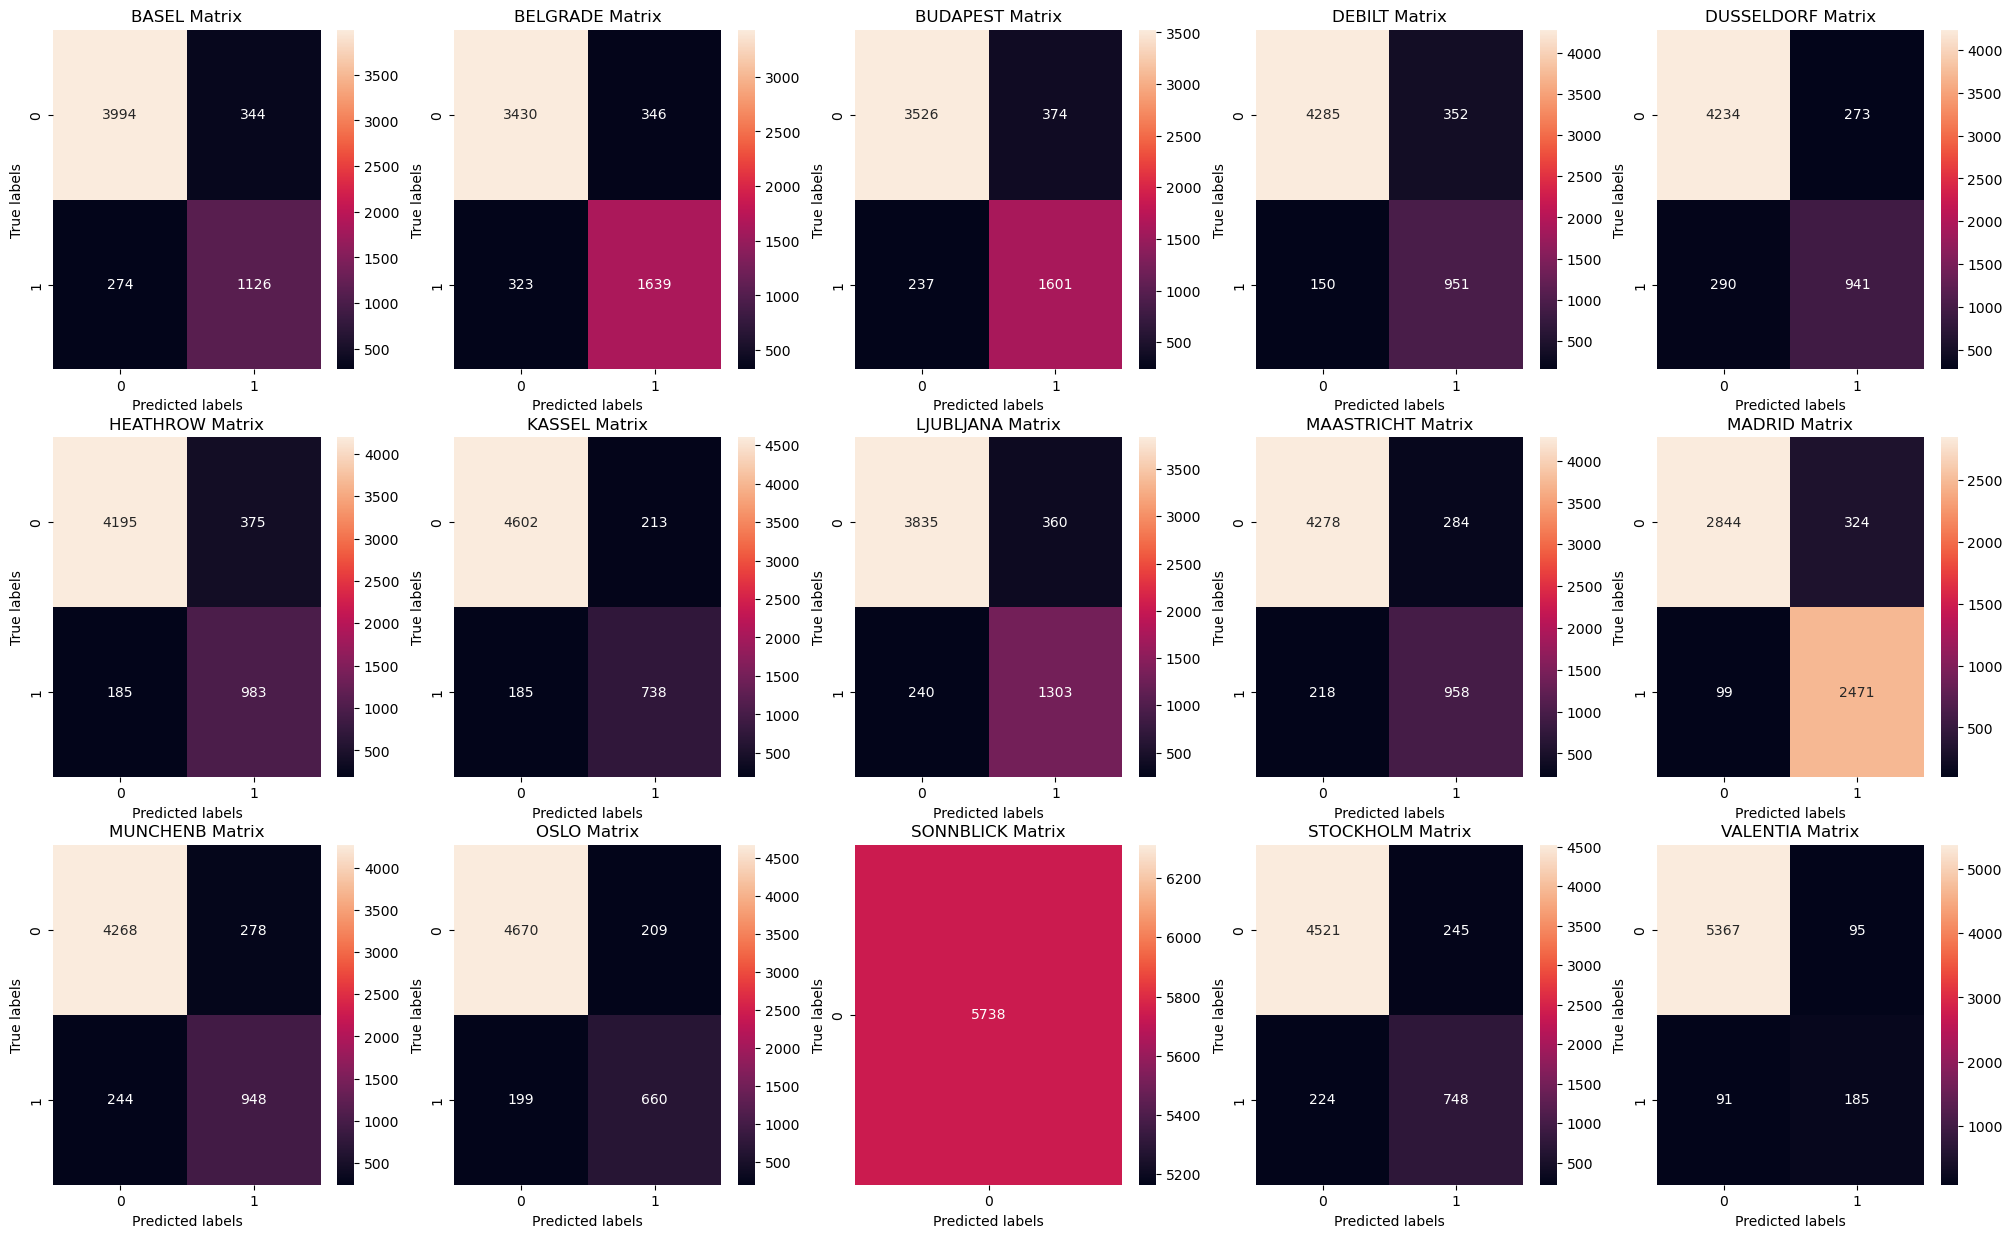

In [17]:
#Confusion matrix based on the last "k" in the sequence (Testing data)
key = '_pleasant_weather'
stations = []
figure, ax = plt.subplots(3, 5, figsize=(25,15))
labels = ['pleasant', 'unpleasant']   
count=0
for i in range(3):
    for j in range(5):
        name = locations[count]
        cm = confusion_matrix(y_test.loc[:,name+key], y_pred_test[:,count])
        disp = ConfusionMatrixDisplay(confusion_matrix=cm)
        ax[i,j] = sns.heatmap(cm, annot=True, fmt='g', ax=ax[i,j]);
        # labels, title and ticks
        ax[i,j].set_xlabel('Predicted labels');
        ax[i,j].set_ylabel('True labels'); 
        ax[i,j].set_title(name +' Matrix'); 
        #ax[i,j].xaxis.set_ticklabels(labels); #These two lines may throw an error depending on SONNBLICK data. Can you tell why?
        #ax[i,j].yaxis.set_ticklabels(labels);
        count+=1

# Creating A New ANN with the same above layers, but different Tolerance.

In [18]:
mlp = MLPClassifier(hidden_layer_sizes=(50, 50, 50), max_iter=500, tol=0.001)
#Fit the data to the model
mlp.fit(X_train, y_train)

MLPClassifier(hidden_layer_sizes=(50, 50, 50), max_iter=500, tol=0.001)

In [19]:
y_pred = mlp.predict(X_train)
print(accuracy_score(y_pred, y_train))
y_pred_test = mlp.predict(X_test)
print(accuracy_score(y_pred_test, y_test))

0.5497327445967929
0.5139421401185081


G:\Anaconda\Lib\site-packages\sklearn\metrics\_classification.py:386: UserWarning: A single label was found in 'y_true' and 'y_pred'. For the confusion matrix to have the correct shape, use the 'labels' parameter to pass all known labels.
  warnings.warn(


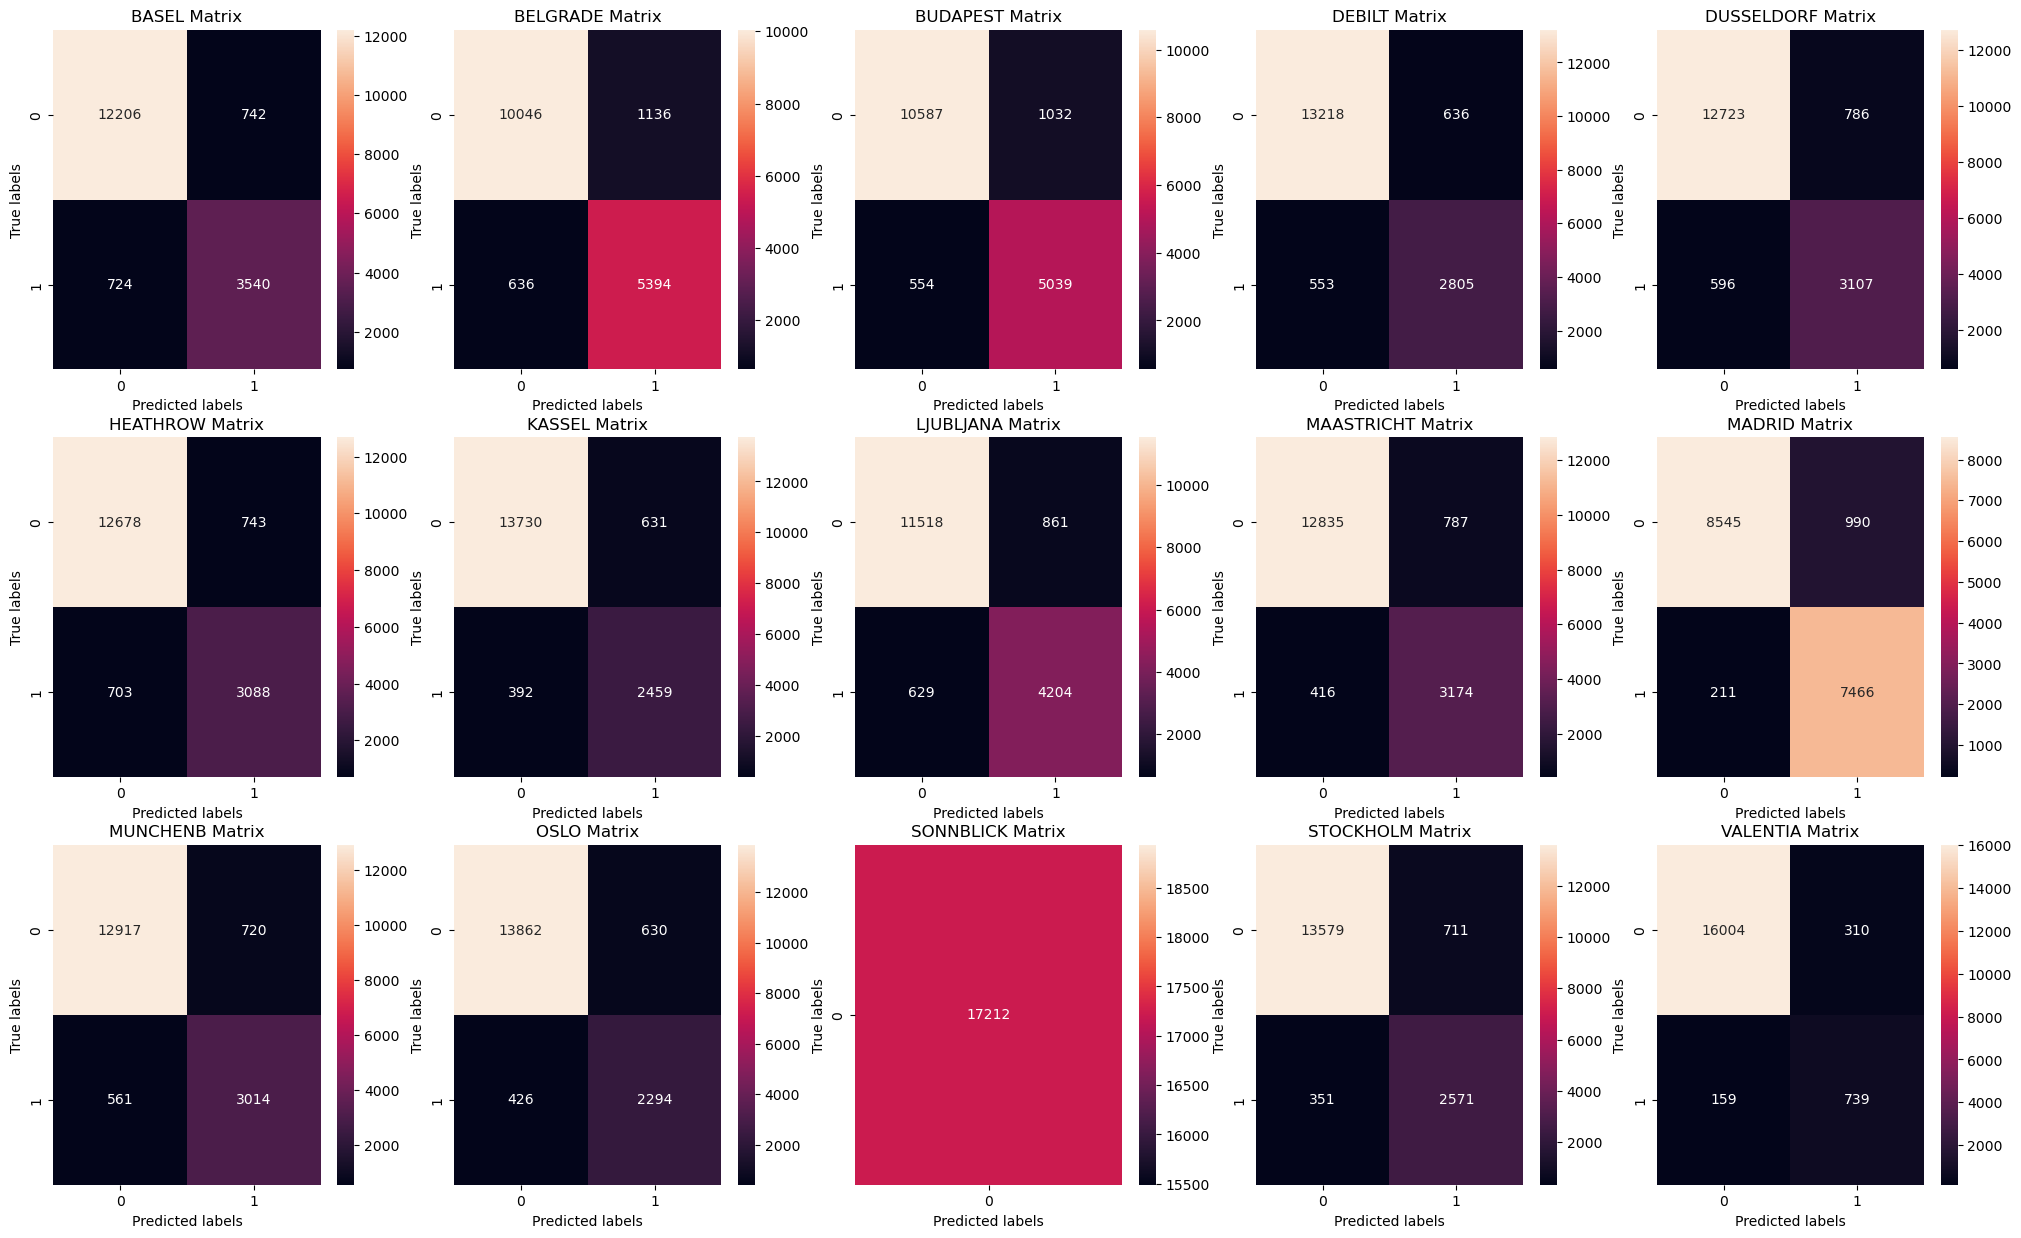

In [20]:
#Confusion matrix based on the last "k" in the sequence (Training data)
key = '_pleasant_weather'
stations = []
figure, ax = plt.subplots(3, 5, figsize=(25,15))
labels = ['pleasant', 'unpleasant']   
count=0
for i in range(3):
    for j in range(5):
        name = locations[count]
        cm = confusion_matrix(y_train.loc[:,name+key], y_pred[:,count])
        disp = ConfusionMatrixDisplay(confusion_matrix=cm)
        ax[i,j] = sns.heatmap(cm, annot=True, fmt='g', ax=ax[i,j]);
        # labels, title and ticks
        ax[i,j].set_xlabel('Predicted labels');
        ax[i,j].set_ylabel('True labels'); 
        ax[i,j].set_title(name +' Matrix'); 
        #ax[i,j].xaxis.set_ticklabels(labels); #These two lines may throw an error depending on SONNBLICK data. Can you tell why?
        #ax[i,j].yaxis.set_ticklabels(labels);
        count+=1

G:\Anaconda\Lib\site-packages\sklearn\metrics\_classification.py:386: UserWarning: A single label was found in 'y_true' and 'y_pred'. For the confusion matrix to have the correct shape, use the 'labels' parameter to pass all known labels.
  warnings.warn(


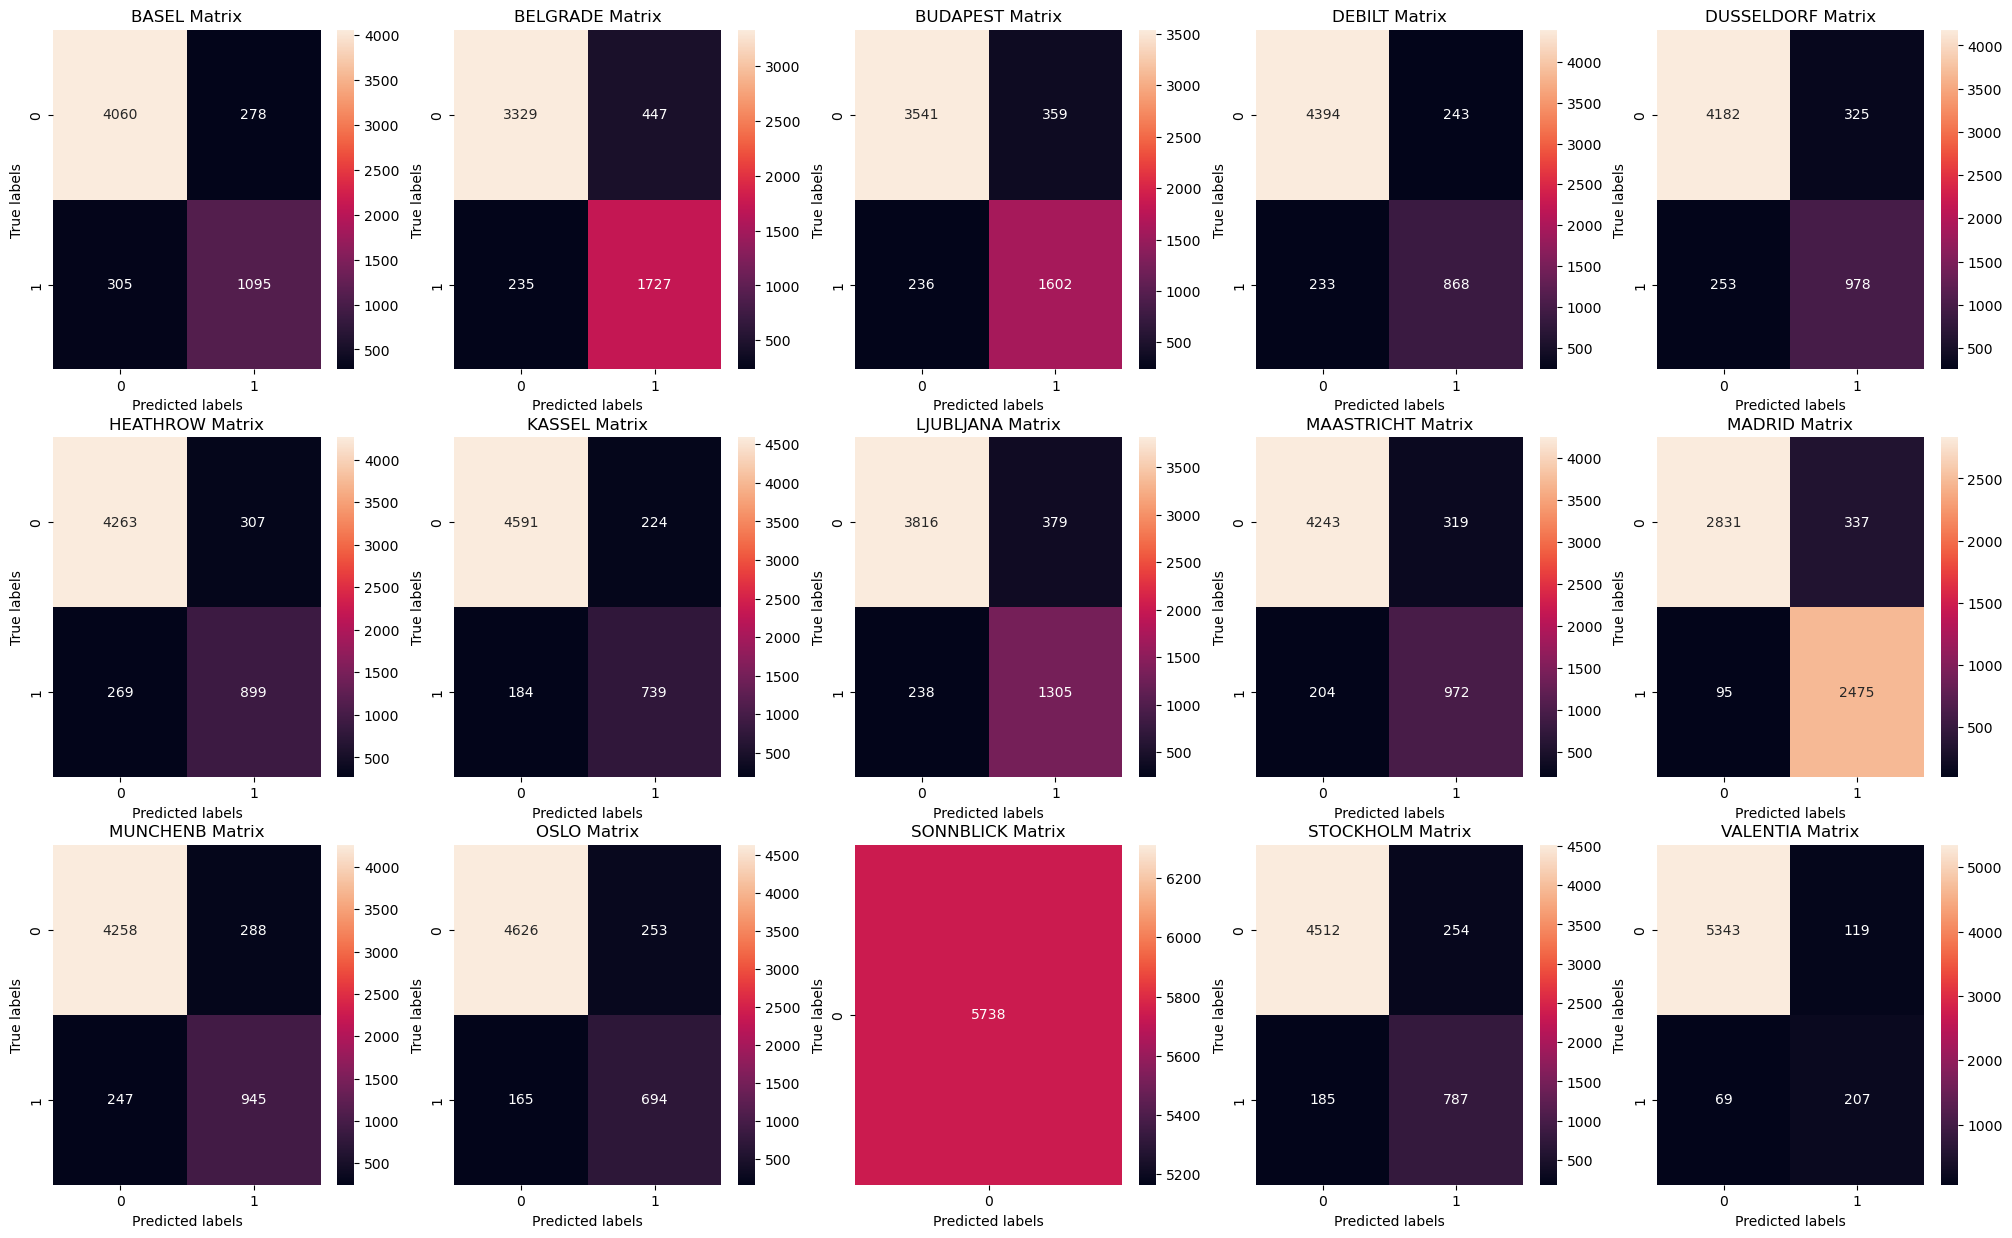

In [21]:
#Confusion matrix based on the last "k" in the sequence (Testing data)
key = '_pleasant_weather'
stations = []
figure, ax = plt.subplots(3, 5, figsize=(25,15))
labels = ['pleasant', 'unpleasant']   
count=0
for i in range(3):
    for j in range(5):
        name = locations[count]
        cm = confusion_matrix(y_test.loc[:,name+key], y_pred_test[:,count])
        disp = ConfusionMatrixDisplay(confusion_matrix=cm)
        ax[i,j] = sns.heatmap(cm, annot=True, fmt='g', ax=ax[i,j]);
        # labels, title and ticks
        ax[i,j].set_xlabel('Predicted labels');
        ax[i,j].set_ylabel('True labels'); 
        ax[i,j].set_title(name +' Matrix'); 
        #ax[i,j].xaxis.set_ticklabels(labels); #These two lines may throw an error depending on SONNBLICK data. Can you tell why?
        #ax[i,j].yaxis.set_ticklabels(labels);
        count+=1

# Creating A New ANN with the same above layers, Old tolerance, more iterations.

In [22]:
mlp = MLPClassifier(hidden_layer_sizes=(50, 50, 50), max_iter=1000, tol=0.0001)
#Fit the data to the model
mlp.fit(X_train, y_train)

MLPClassifier(hidden_layer_sizes=(50, 50, 50), max_iter=1000)

In [23]:
y_pred = mlp.predict(X_train)
print(accuracy_score(y_pred, y_train))
y_pred_test = mlp.predict(X_test)
print(accuracy_score(y_pred_test, y_test))

0.5495003485940042
0.5118508191007319


G:\Anaconda\Lib\site-packages\sklearn\metrics\_classification.py:386: UserWarning: A single label was found in 'y_true' and 'y_pred'. For the confusion matrix to have the correct shape, use the 'labels' parameter to pass all known labels.
  warnings.warn(


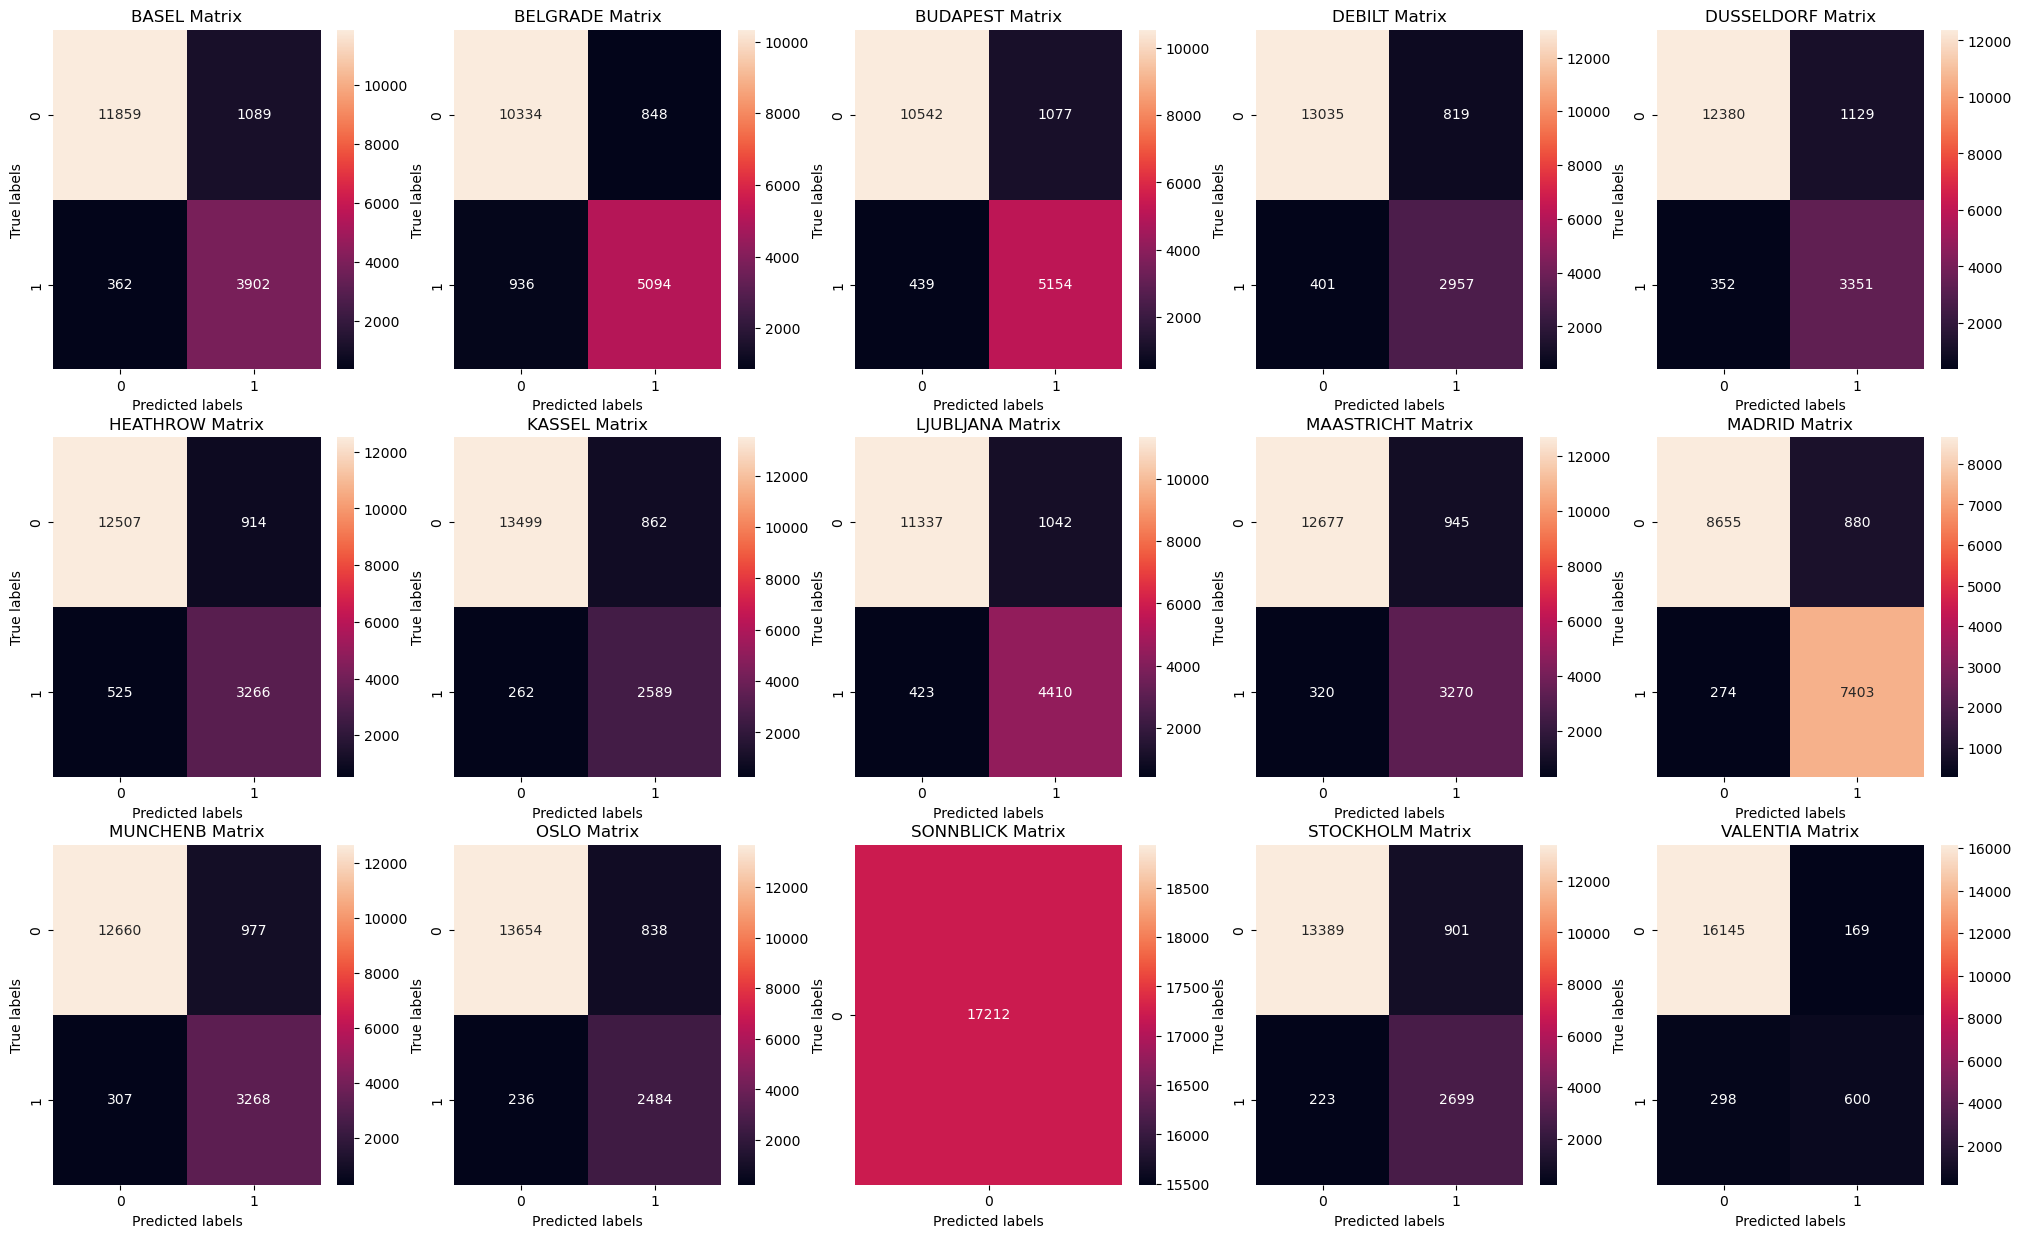

In [24]:
#Confusion matrix based on the last "k" in the sequence (Training data)
key = '_pleasant_weather'
stations = []
figure, ax = plt.subplots(3, 5, figsize=(25,15))
labels = ['pleasant', 'unpleasant']   
count=0
for i in range(3):
    for j in range(5):
        name = locations[count]
        cm = confusion_matrix(y_train.loc[:,name+key], y_pred[:,count])
        disp = ConfusionMatrixDisplay(confusion_matrix=cm)
        ax[i,j] = sns.heatmap(cm, annot=True, fmt='g', ax=ax[i,j]);
        # labels, title and ticks
        ax[i,j].set_xlabel('Predicted labels');
        ax[i,j].set_ylabel('True labels'); 
        ax[i,j].set_title(name +' Matrix'); 
        #ax[i,j].xaxis.set_ticklabels(labels); #These two lines may throw an error depending on SONNBLICK data. Can you tell why?
        #ax[i,j].yaxis.set_ticklabels(labels);
        count+=1
        
figure.savefig(os.path.join(path, 'Supervised', '1.5_ytrain_ann_scaled_confusion_matrices.png'))

G:\Anaconda\Lib\site-packages\sklearn\metrics\_classification.py:386: UserWarning: A single label was found in 'y_true' and 'y_pred'. For the confusion matrix to have the correct shape, use the 'labels' parameter to pass all known labels.
  warnings.warn(


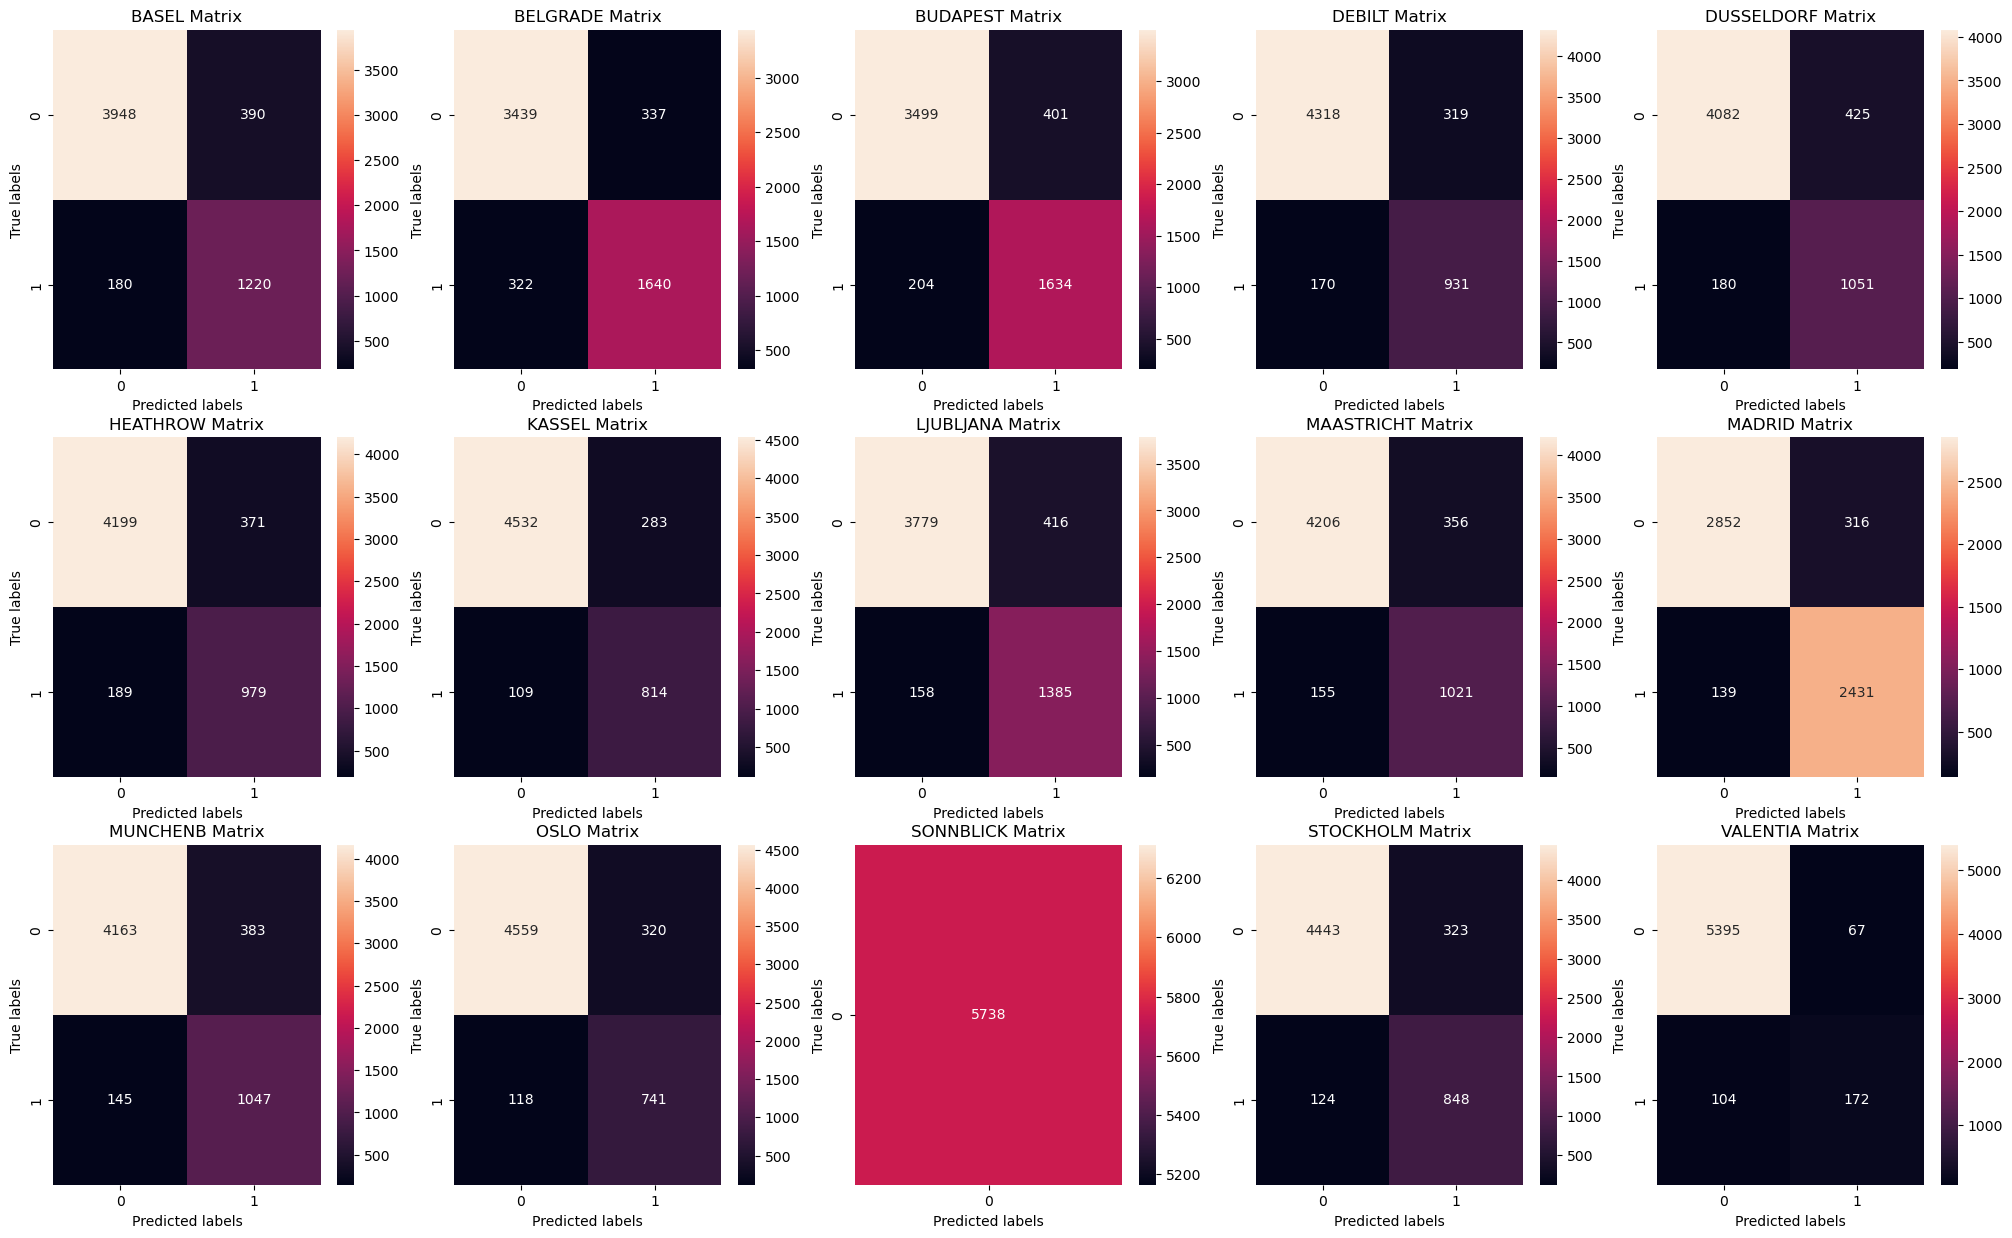

In [25]:
#Confusion matrix based on the last "k" in the sequence (Testing data)
key = '_pleasant_weather'
stations = []
figure, ax = plt.subplots(3, 5, figsize=(25,15))
labels = ['pleasant', 'unpleasant']   
count=0
for i in range(3):
    for j in range(5):
        name = locations[count]
        cm = confusion_matrix(y_test.loc[:,name+key], y_pred_test[:,count])
        disp = ConfusionMatrixDisplay(confusion_matrix=cm)
        ax[i,j] = sns.heatmap(cm, annot=True, fmt='g', ax=ax[i,j]);
        # labels, title and ticks
        ax[i,j].set_xlabel('Predicted labels');
        ax[i,j].set_ylabel('True labels'); 
        ax[i,j].set_title(name +' Matrix'); 
        #ax[i,j].xaxis.set_ticklabels(labels); #These two lines may throw an error depending on SONNBLICK data. Can you tell why?
        #ax[i,j].yaxis.set_ticklabels(labels);
        count+=1
        
figure.savefig(os.path.join(path, 'Supervised', '1.5_ytest_ann_scaled_confusion_matrices.png'))